# Final Project

Use Machine Learning to train a model that can accurately classify audio tracks into genres.

## Libraries & Data

In [53]:
import pandas as pd                             # Added to manipulate data and analyze it
import numpy as np                              # Used for numerical computations
import matplotlib.pyplot as plt                 # Used to visualize data
import seaborn as sns                           # Used to visualize data

from sklearn.preprocessing import LabelEncoder    # Used for label Encoding of categorical variables
from sklearn.preprocessing import MinMaxScaler    # Feauture Scaling for Normalization
from sklearn.preprocessing import StandardScaler  # Feature Scaling for Standardization

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

## Data Analysis

### Basic Information

In [2]:
#Load the data
songs_data = pd.read_csv(r"..\data\songs_data.csv", index_col=0)

In [3]:
#Basic Information
print("Displaying first five rows:")
songs_data.head()

Displaying first five rows:


track_name   track_artist  \
track_id                                                              
6ho0GyrWZN3mhi9zVRW7xi                     Losing It         FISHER   
4bYJKHG6KLdGzHQRJMaFc8        Rock And Roll All Nite           KISS   
1VGlMYqPO1LHyclvfIMvWI  Snälla bli min (Hjalm Remix)  Robin Lukovic   
6BbINUfGabVyiNFJpQXn3x                        Wicked         Future   
1Ly0ssAgeM7YqdHptao8Oe                      Paranoid  Black Sabbath   

                        track_popularity genre  danceability  energy  key  \
track_id                                                                    
6ho0GyrWZN3mhi9zVRW7xi                79   edm         0.760   0.964    2   
4bYJKHG6KLdGzHQRJMaFc8                 3  rock         0.581   0.831    1   
1VGlMYqPO1LHyclvfIMvWI                 0   edm         0.661   0.760    8   
6BbINUfGabVyiNFJpQXn3x                62   rap         0.718   0.679   11   
1Ly0ssAgeM7YqdHptao8Oe                15  rock         0.426   0.619    4   

                        loudness  mode  speechiness  acousticness  \
track_id                                                            
6ho0GyrWZN3mhi9zVRW7xi    -5.844     1       0.0576      0.001820   
4bYJKHG6KLdGzHQRJMaFc8    -8.045     1       0.1070      0.045800   
1VGlMYqPO1LHyclvfIMvWI    -4.769     1       0.0268      0.000406   
6BbINUfGabVyiNFJpQXn3x    -5.899     0       0.0706      0.001910   
1Ly0ssAgeM7YqdHptao8Oe   -11.501     0       0.0722      0.000084   

                        instrumentalness  liveness  valence    tempo  \
track_id                                                               
6ho0GyrWZN3mhi9zVRW7xi           0.70000    0.0974    0.641  125.000   
4bYJKHG6KLdGzHQRJMaFc8           0.00000    0.0782    0.885  144.684   
1VGlMYqPO1LHyclvfIMvWI           0.04070    0.6110    0.439   99.993   
6BbINUfGabVyiNFJpQXn3x           0.01040    0.3850    0.205  157.970   
1Ly0ssAgeM7YqdHptao8Oe           0.00239    0.1700    0.382  162.721   

                        duration_ms  
track_id                             
6ho0GyrWZN3mhi9zVRW7xi       248036  
4bYJKHG6KLdGzHQRJMaFc8       168160  
1VGlMYqPO1LHyclvfIMvWI       271238  
6BbINUfGabVyiNFJpQXn3x       173347  
1Ly0ssAgeM7YqdHptao8Oe       168440

In [4]:
print("Number of (rows, columns):", songs_data.shape)

Number of (rows, columns): (28396, 16)


In [5]:
print("Information about the dataset:")
songs_data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 28396 entries, 6ho0GyrWZN3mhi9zVRW7xi to 6sYJuVcEu4gFHmeTLdHzRz
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        28392 non-null  object 
 1   track_artist      28392 non-null  object 
 2   track_popularity  28396 non-null  int64  
 3   genre             28396 non-null  object 
 4   danceability      28396 non-null  float64
 5   energy            28396 non-null  float64
 6   key               28396 non-null  int64  
 7   loudness          28396 non-null  float64
 8   mode              28396 non-null  int64  
 9   speechiness       28396 non-null  float64
 10  acousticness      28396 non-null  float64
 11  instrumentalness  28396 non-null  float64
 12  liveness          28396 non-null  float64
 13  valence           28396 non-null  float64
 14  tempo             28396 non-null  float64
 15  duration_ms       28396

We know that we have 28396 entries in 17 columns.

In the column 'Dtype', we can see what kind of data type each column uses.
- object = categorical data
- float64 and int64 = numeric data  

We have 13 numeric columns and 4 categorical columns.

In the column 'Non-Null Count', we can observe that the 'track_name' and 'track_artist' have missing data, since 28392 < 28396.

Apparently, only categorical columns have missing values and the amount is not significant.

In [6]:
print("Count unique values in the genre column:")
songs_data['genre'].value_counts()

Count unique values in the genre column:


genre
rap      5412
pop      5143
edm      4878
r&b      4509
rock     4312
latin    4142
Name: count, dtype: int64

### Numerical & Categorical Summary Statistics

Numerical Summary Statistics provides data about: mean, standard deviation ('std'), minimum value ('min'), maximum value ('max'), median ('50%'), lower quartile ('25%'), and upper quartile ('75%').

Categorical Summary Statistics provides data about: count, count of unique entries ('unique'), mode ('top'), frequency ('freq').

In [7]:
print("Summary statistics for numerical attributes:")
songs_data.describe()

Summary statistics for numerical attributes:


track_popularity  danceability        energy           key  \
count      28396.000000  28396.000000  28396.000000  28396.000000   
mean          39.336104      0.653386      0.698387      5.368256   
std           23.706486      0.145799      0.183484      3.613898   
min            0.000000      0.000000      0.000175      0.000000   
25%           21.000000      0.561000      0.579000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28396.000000  28396.000000  28396.000000  28396.000000   
mean      -6.817541      0.565397      0.107990      0.177263   
std        3.036443      0.495714      0.102623      0.222908   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.309000      0.000000      0.041000      0.014400   
50%       -6.262000      1.000000      0.062700      0.079700   
75%       -4.708750      1.000000      0.133000      0.260000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      28396.000000  28396.000000  28396.000000  28396.000000   
mean           0.091143      0.190986      0.510434    120.955390   
std            0.232566      0.156015      0.234309     26.957635   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092600      0.329000     99.972000   
50%            0.000021      0.127000      0.512000    121.993000   
75%            0.006573      0.249000      0.695000    133.999500   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   28396.000000  
mean   226575.367094  
std     61076.581384  
min      4000.000000  
25%    187766.500000  
50%    216921.000000  
75%    254965.500000  
max    517810.000000

In [8]:
print("Summary statistics for categorical attributes:")
songs_data.describe(include=['object'])

Summary statistics for categorical attributes:


track_name track_artist  genre
count       28392        28392  28396
unique      23449        10692      6
top       Breathe        Queen    rap
freq           18          131   5412

## Data View

### Histogram for numerical attributes

Histograms for numerical attributes can help us visual the distribution of the dataset, and identify if there is a normal distribution or a skewed distribution.

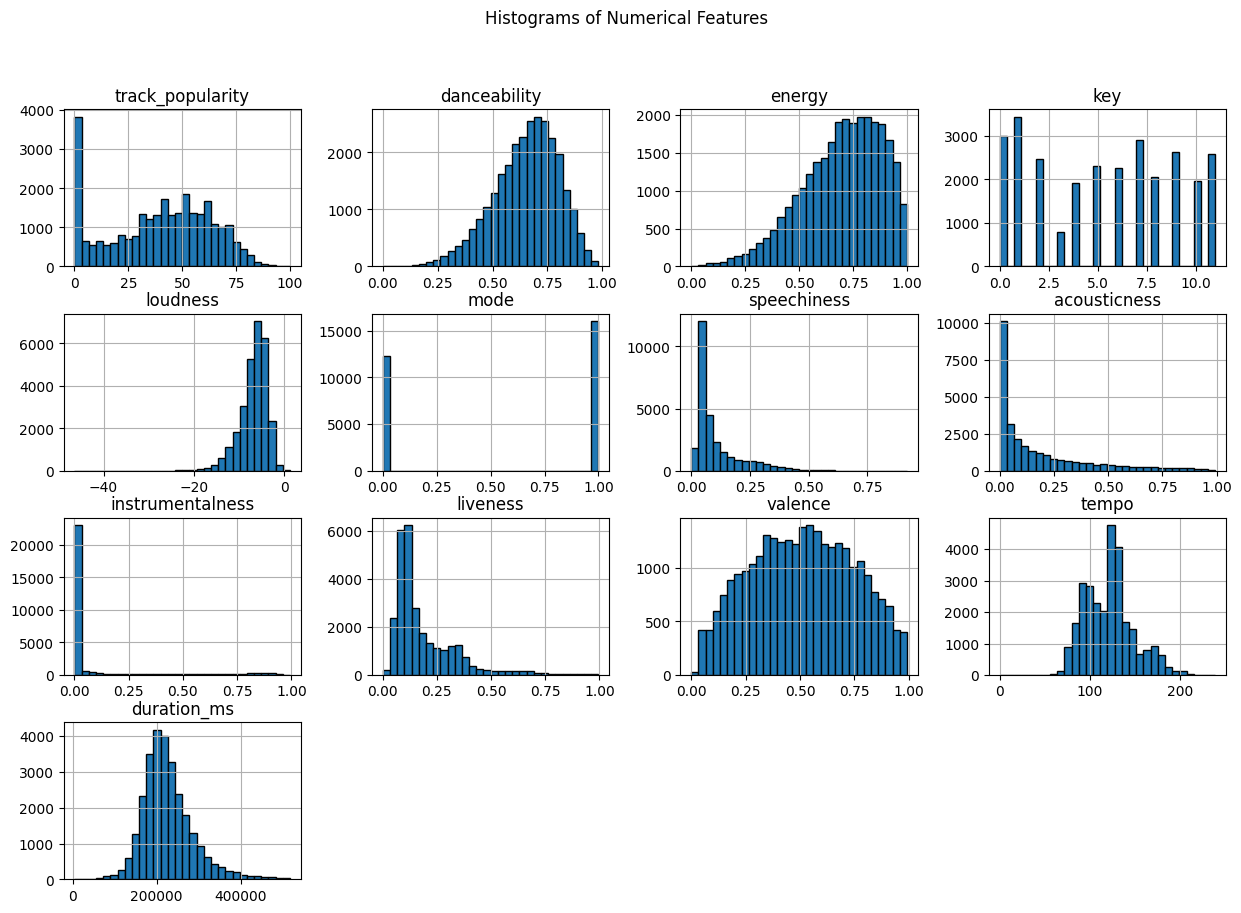

In [9]:
# Histograms for numerical features
numerical_features = songs_data.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

**Findings**

Most of the distribution are skewed.

### Distribution of Genre

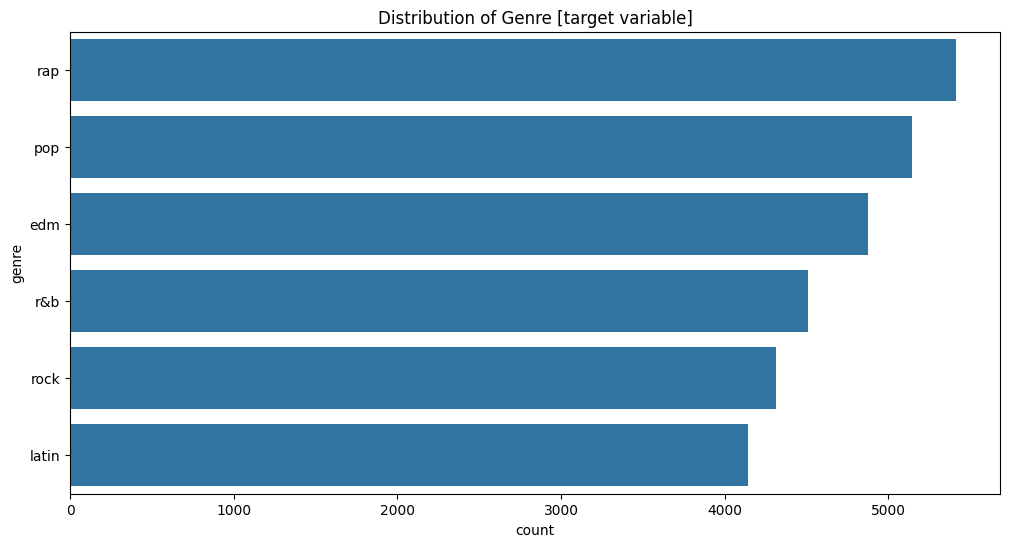

In [10]:
# Distribution of target variable 'genre'
plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=songs_data, order=songs_data['genre'].value_counts().index)
plt.title('Distribution of Genre [target variable]')
plt.show()

### Exploring Feature-Target Relationships

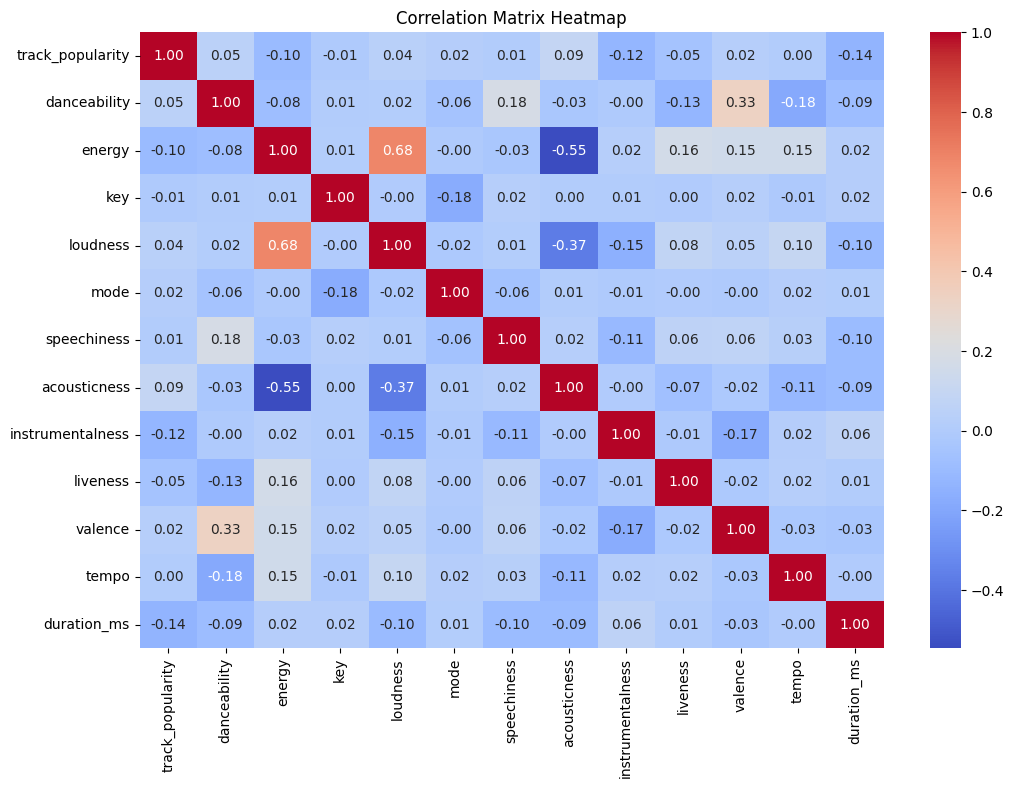

In [11]:
# Correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

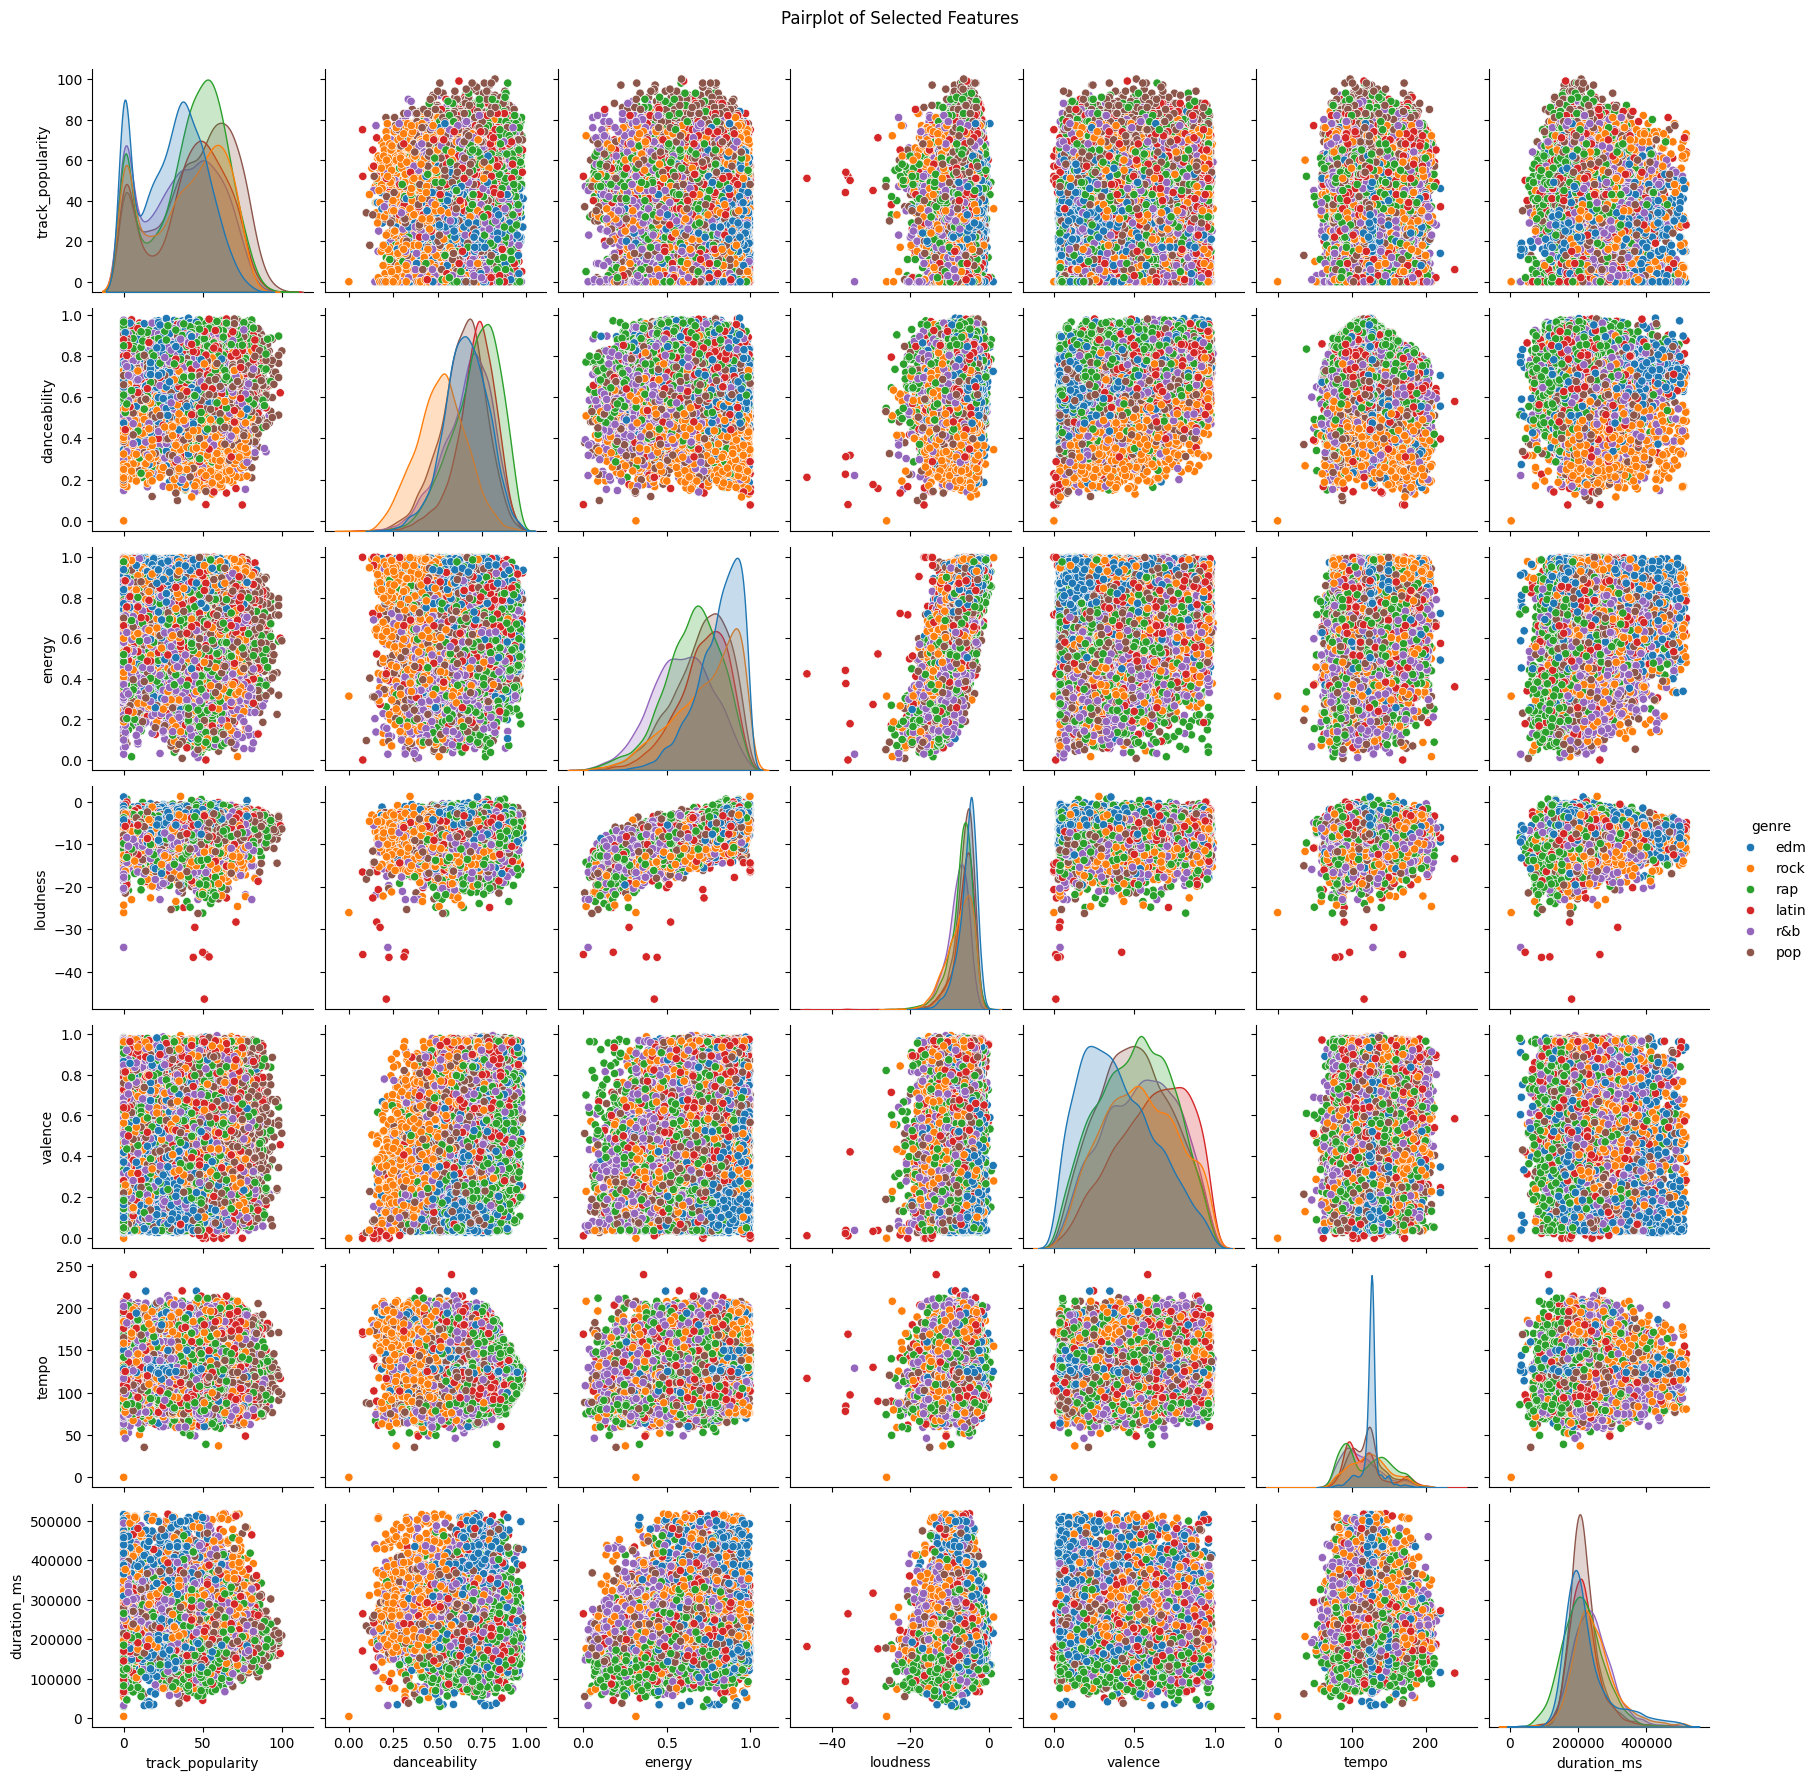

In [12]:
# Pairplot for selected features
selected_features = ['track_popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo', 'duration_ms']
sns.pairplot(songs_data, vars=selected_features, hue='genre')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

### Boxplots

With boxplots, we are able to spot outliers very easily.

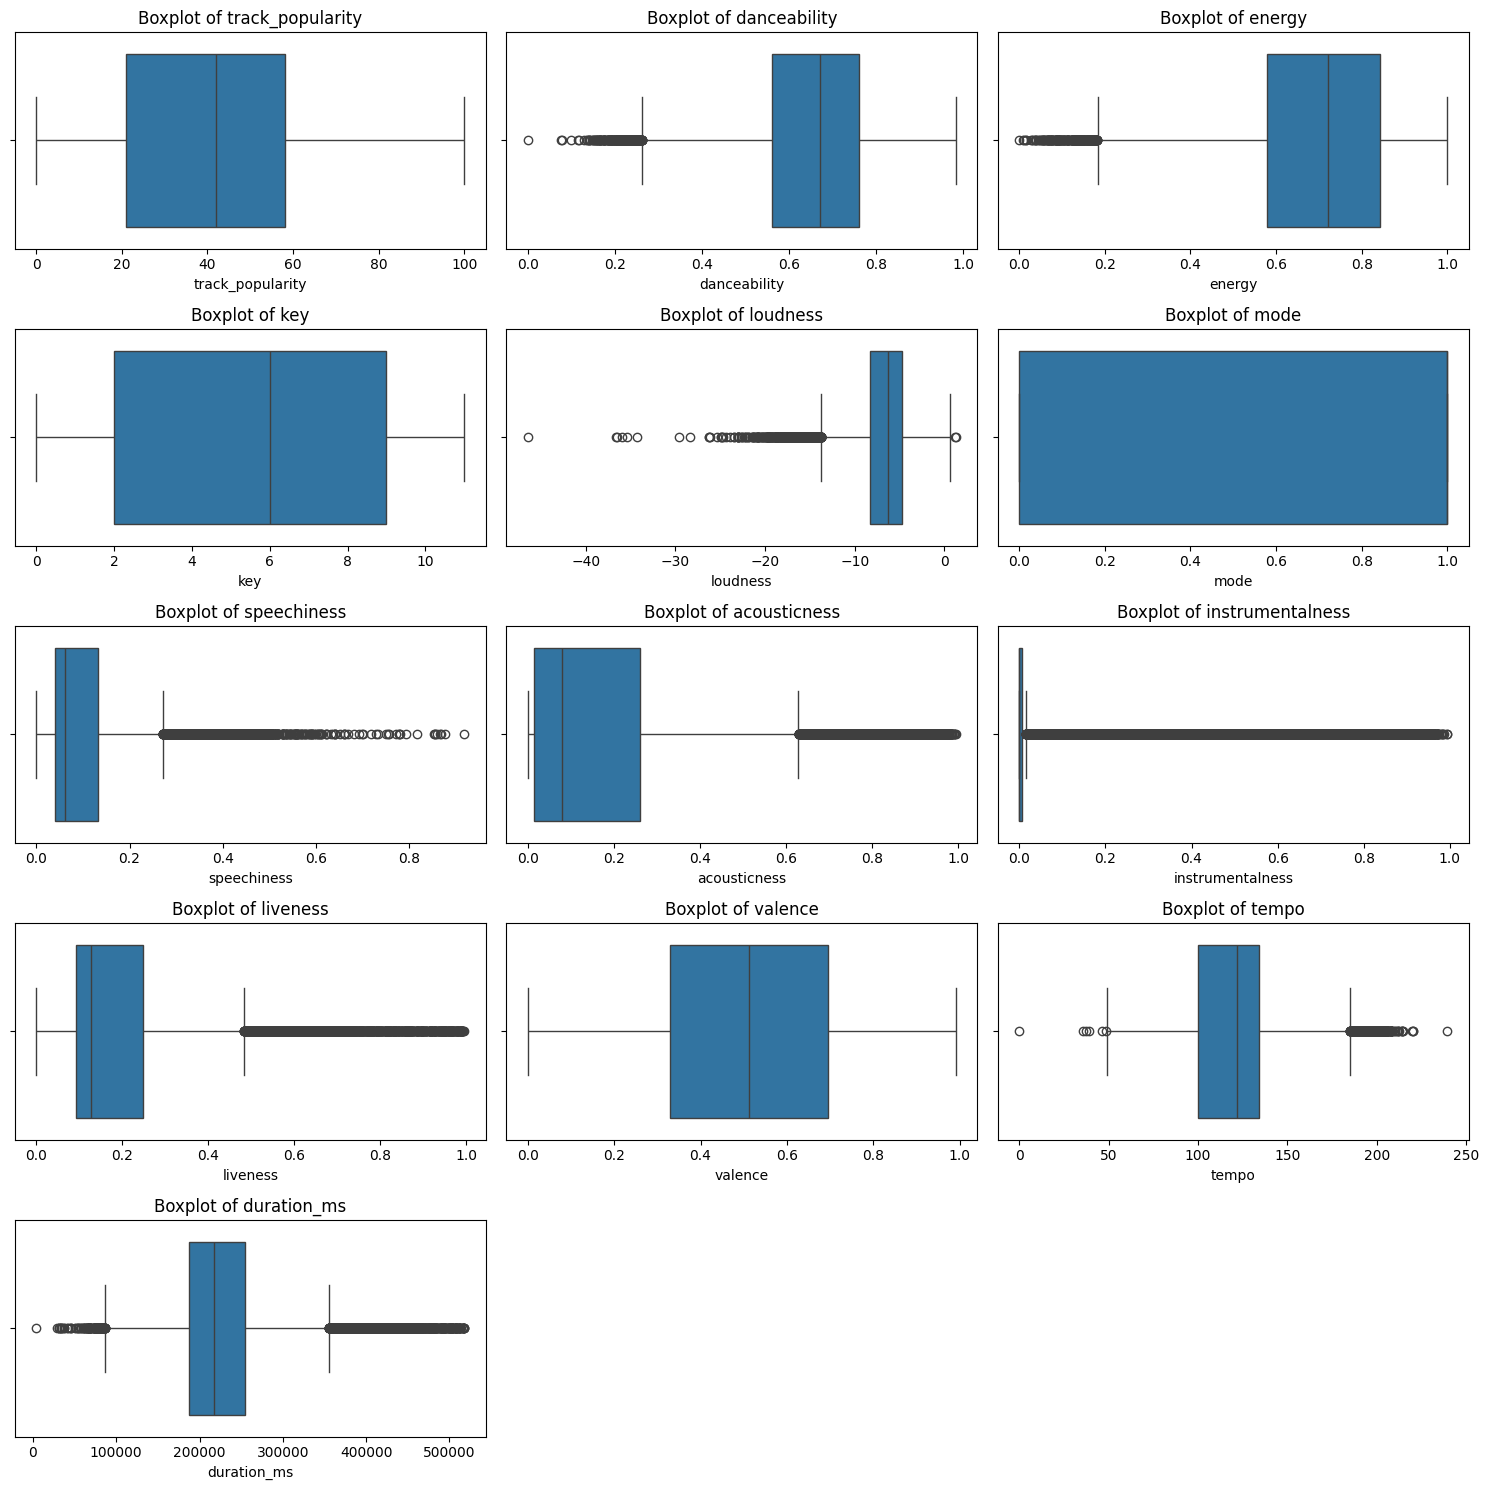

In [13]:
# Select numeric columns
numeric_columns = songs_data.select_dtypes(include=['float64', 'int64']).columns

# Number of columns to display side by side
num_columns = 3

# Create subplots
fig, axes = plt.subplots(nrows=(len(numeric_columns) + num_columns - 1) // num_columns, ncols=num_columns, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through columns and create boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=songs_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Data Cleaning

### Missing Values

Observing the missing values in the dataset.

In [14]:
print("Check for missing values:")
songs_data.isnull().sum()

Check for missing values:


track_name          4
track_artist        4
track_popularity    0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

**Findings**

We have 4 missing values for 'track_name' and 4 missing values for  'track_artist'.

### Handling Missing Values

We found out that the dataset has 4 missing values for 'track_name' and 'track_artist' each. Missing values can distort the analysis and modeling process.

Assuming 'track_name' and 'track_artist' are crucial for identifying tracks and since the missing amount is not significantly large, we simply drop rows where they are missing.

In [15]:
#Handling missing values by dropping rows with missing 'track_name' or 'track_artist"
songs_data = songs_data.dropna(subset=['track_name', 'track_artist'])

print("Check for missing values again:")
songs_data.isnull().sum()

Check for missing values again:


track_name          0
track_artist        0
track_popularity    0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

### Removing Duplicates

Duplicates can lead to bias in the model, as the same data point would be counted multiple times.

Removing duplicates helps ensure that each data point is unique, providing a more accurate and fair analysis.

In [16]:
# Check for duplicates
print("There are ", songs_data.duplicated().sum(), " duplicate rows in the dataset.")

There are  55  duplicate rows in the dataset.


In [17]:
# Removig duplicates
songs_data = songs_data.drop_duplicates()

# Confirm removal of duplicates
print("There are ", songs_data.duplicated().sum(), " duplicate rows in the dataset.")

There are  0  duplicate rows in the dataset.


### Dropping Unnecessary Columns

Remove columns that are not used in the model to simplify the dataset.

In [18]:
# Removing columns that wont be used on the Model Train
songs_data = songs_data.drop(['track_name', 'track_artist'], axis=1)

# Check if the columns are dropped
songs_data.head()

track_popularity genre  danceability  energy  key  \
track_id                                                                    
6ho0GyrWZN3mhi9zVRW7xi                79   edm         0.760   0.964    2   
4bYJKHG6KLdGzHQRJMaFc8                 3  rock         0.581   0.831    1   
1VGlMYqPO1LHyclvfIMvWI                 0   edm         0.661   0.760    8   
6BbINUfGabVyiNFJpQXn3x                62   rap         0.718   0.679   11   
1Ly0ssAgeM7YqdHptao8Oe                15  rock         0.426   0.619    4   

                        loudness  mode  speechiness  acousticness  \
track_id                                                            
6ho0GyrWZN3mhi9zVRW7xi    -5.844     1       0.0576      0.001820   
4bYJKHG6KLdGzHQRJMaFc8    -8.045     1       0.1070      0.045800   
1VGlMYqPO1LHyclvfIMvWI    -4.769     1       0.0268      0.000406   
6BbINUfGabVyiNFJpQXn3x    -5.899     0       0.0706      0.001910   
1Ly0ssAgeM7YqdHptao8Oe   -11.501     0       0.0722      0.000084   

                        instrumentalness  liveness  valence    tempo  \
track_id                                                               
6ho0GyrWZN3mhi9zVRW7xi           0.70000    0.0974    0.641  125.000   
4bYJKHG6KLdGzHQRJMaFc8           0.00000    0.0782    0.885  144.684   
1VGlMYqPO1LHyclvfIMvWI           0.04070    0.6110    0.439   99.993   
6BbINUfGabVyiNFJpQXn3x           0.01040    0.3850    0.205  157.970   
1Ly0ssAgeM7YqdHptao8Oe           0.00239    0.1700    0.382  162.721   

                        duration_ms  
track_id                             
6ho0GyrWZN3mhi9zVRW7xi       248036  
4bYJKHG6KLdGzHQRJMaFc8       168160  
1VGlMYqPO1LHyclvfIMvWI       271238  
6BbINUfGabVyiNFJpQXn3x       173347  
1Ly0ssAgeM7YqdHptao8Oe       168440

### Treating Outliers

Outliers can skew and mislead the results of the analysis and the performance of the model, whether they are genuine extreme values or errors in the data.

Analysing the histogram, we concluded that most of the distributions are skewed or doesn't have a significant distribution pattern, imputation might be the most effective approach.

**Imputation with median:**
Preferred for its robustness to outliers and ability to preserve the data’s distribution.

Pro:
* Simplicity
* Preserves Dataset Size
* Central Tendency


In [19]:
# Check before
songs_data.describe()

track_popularity  danceability        energy           key  \
count      28337.000000  28337.000000  28337.000000  28337.000000   
mean          39.336980      0.653409      0.698341      5.367258   
std           23.693901      0.145773      0.183506      3.613690   
min            0.000000      0.000000      0.000175      0.000000   
25%           21.000000      0.561000      0.579000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28337.000000  28337.000000  28337.000000  28337.000000   
mean      -6.818328      0.565515      0.107926      0.177245   
std        3.036876      0.495698      0.102554      0.222842   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.312000      0.000000      0.041000      0.014400   
50%       -6.261000      1.000000      0.062600      0.079700   
75%       -4.709000      1.000000      0.133000      0.260000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      28337.000000  28337.000000  28337.000000  28337.000000   
mean           0.091067      0.190957      0.510406    120.950651   
std            0.232475      0.155892      0.234369     26.951654   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092600      0.329000     99.972000   
50%            0.000021      0.127000      0.512000    121.993000   
75%            0.006570      0.249000      0.695000    133.998000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   28337.000000  
mean   226564.281928  
std     61080.083121  
min      4000.000000  
25%    187739.000000  
50%    216923.000000  
75%    254963.000000  
max    517810.000000

Hence, we can see that the columns `track_name`, `track_artist`, `track_id` aren't in our dataset anymore.

In [20]:
numeric_columns = songs_data.select_dtypes(include=['float64', 'int64']).columns

# Function to handle outliers with imputation using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)      #Q1 = the lower quartile (25th percentile)
    Q3 = df[column].quantile(0.75)      #Q2 = the upper quartile (75th percentile)
    IQR = Q3 - Q1                       #IQR = the range between Q1 & Q3
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where(df[column] < lower_bound, median, df[column])
    df[column] = np.where(df[column] > upper_bound, median, df[column])

# Loop through each numeric column and apply the handle_outliers_iqr function
for column in numeric_columns:
    handle_outliers_iqr(songs_data, column)

#Check after
songs_data.describe()

track_popularity  danceability        energy           key  \
count      28337.000000  28337.000000  28337.000000  28337.000000   
mean          39.336980      0.657514      0.703041      5.367258   
std           23.693901      0.139605      0.176182      3.613690   
min            0.000000      0.263000      0.183000      0.000000   
25%           21.000000      0.566000      0.584000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28337.000000  28337.000000  28337.000000  28337.000000   
mean      -6.527809      0.565515      0.079394      0.130266   
std        2.513266      0.495698      0.056437      0.152409   
min      -13.716000      0.000000      0.000000      0.000000   
25%       -8.003000      0.000000      0.041000      0.014400   
50%       -6.261000      1.000000      0.062600      0.079700   
75%       -4.709000      1.000000      0.093300      0.193000   
max        0.642000      1.000000      0.271000      0.628000   

       instrumentalness      liveness       valence         tempo  \
count      28337.000000  28337.000000  28337.000000  28337.000000   
mean           0.000654      0.160194      0.510406    119.713661   
std            0.002184      0.098520      0.234369     25.058076   
min            0.000000      0.000000      0.000000     48.981000   
25%            0.000000      0.092600      0.329000     99.973000   
50%            0.000021      0.127000      0.512000    121.993000   
75%            0.000046      0.206000      0.695000    131.760000   
max            0.016400      0.483000      0.991000    185.024000   

         duration_ms  
count   28337.000000  
mean   219884.838374  
std     47326.961167  
min     87000.000000  
25%    188239.000000  
50%    216923.000000  
75%    247427.000000  
max    355787.000000

Expected Results:

* Min and Max: No longer show extreme values.
* Quartiles (25%, 50%, 75%): Remain relatively stable, indicating that central tendency is preserved.
* Mean and Standard Deviation: More representative of the central data, with reduced variability due to outliers.

## Feature Engineering

We review the histograms once more to identify the outliers that were treated and to determine if the distributions are skewed or not, and whether they need further feature engineering.

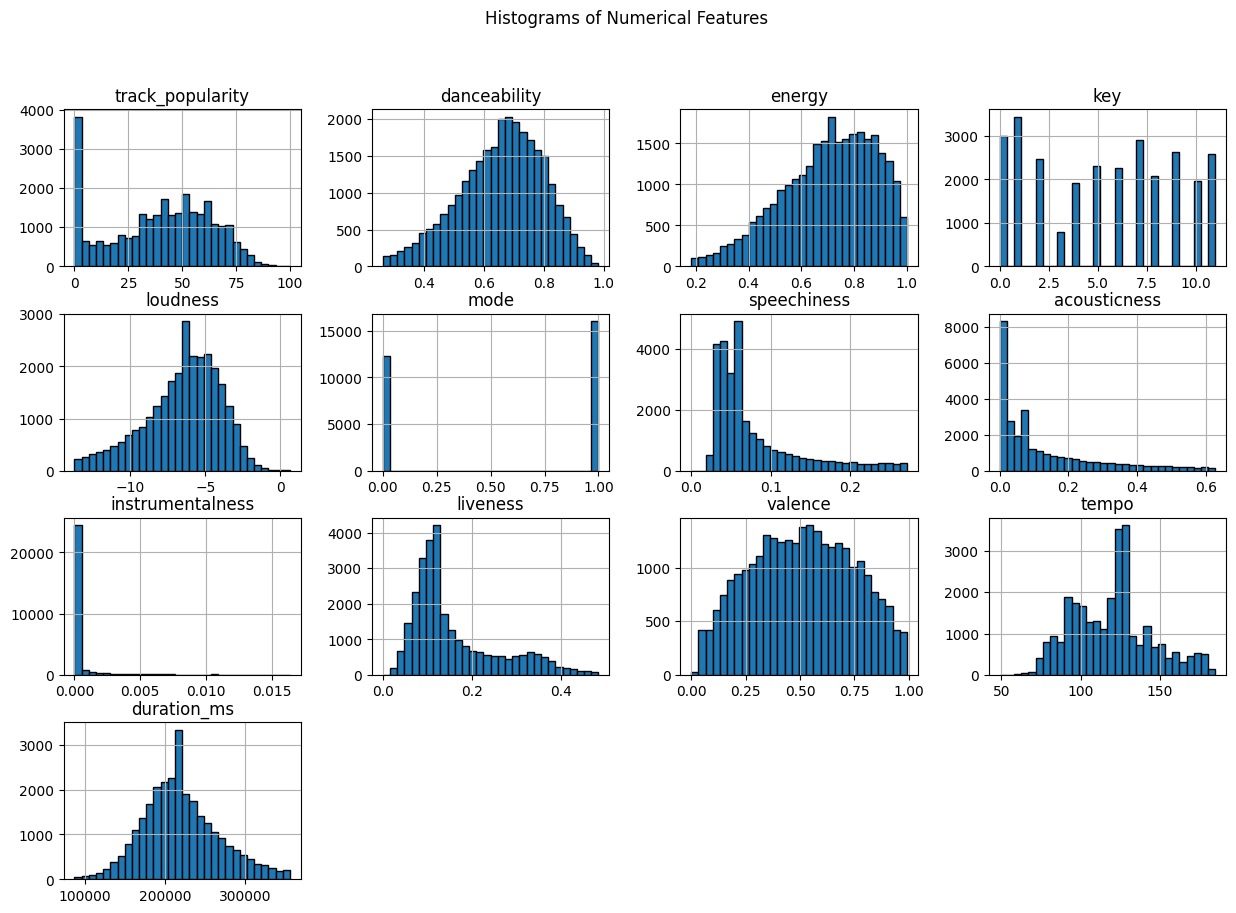

In [21]:
# Histograms for numerical features
numerical_features = songs_data.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Label Encoding for the Target Variable `genre`

Label encoding is used to convert the `genre` column into numeric values. This will create a new column `genre_encoded`.

In [22]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encoding for 'genre' column
songs_data['genre_encoded'] = label_encoder.fit_transform(songs_data['genre'])
songs_data['genre_encoded'].unique()

# Display the first few rows to check the binning
print(songs_data[['genre', 'genre_encoded']].head())

                       genre  genre_encoded
track_id                                   
6ho0GyrWZN3mhi9zVRW7xi   edm              0
4bYJKHG6KLdGzHQRJMaFc8  rock              5
1VGlMYqPO1LHyclvfIMvWI   edm              0
6BbINUfGabVyiNFJpQXn3x   rap              4
1Ly0ssAgeM7YqdHptao8Oe  rock              5


In [23]:
# Create a DataFrame to map genres to their encoded values
genre_mapping = pd.DataFrame({
    'genre': label_encoder.classes_,
    'genre_encoded': range(len(label_encoder.classes_))
})

# Display the genre mapping
print(genre_mapping)

   genre  genre_encoded
0    edm              0
1  latin              1
2    pop              2
3    r&b              3
4    rap              4
5   rock              5


In [24]:
songs_data['genre_encoded'].value_counts()

genre_encoded
4    5396
2    5129
0    4873
3    4503
5    4302
1    4134
Name: count, dtype: int64

We review the correlation map again, this time including the genre_encoded column.

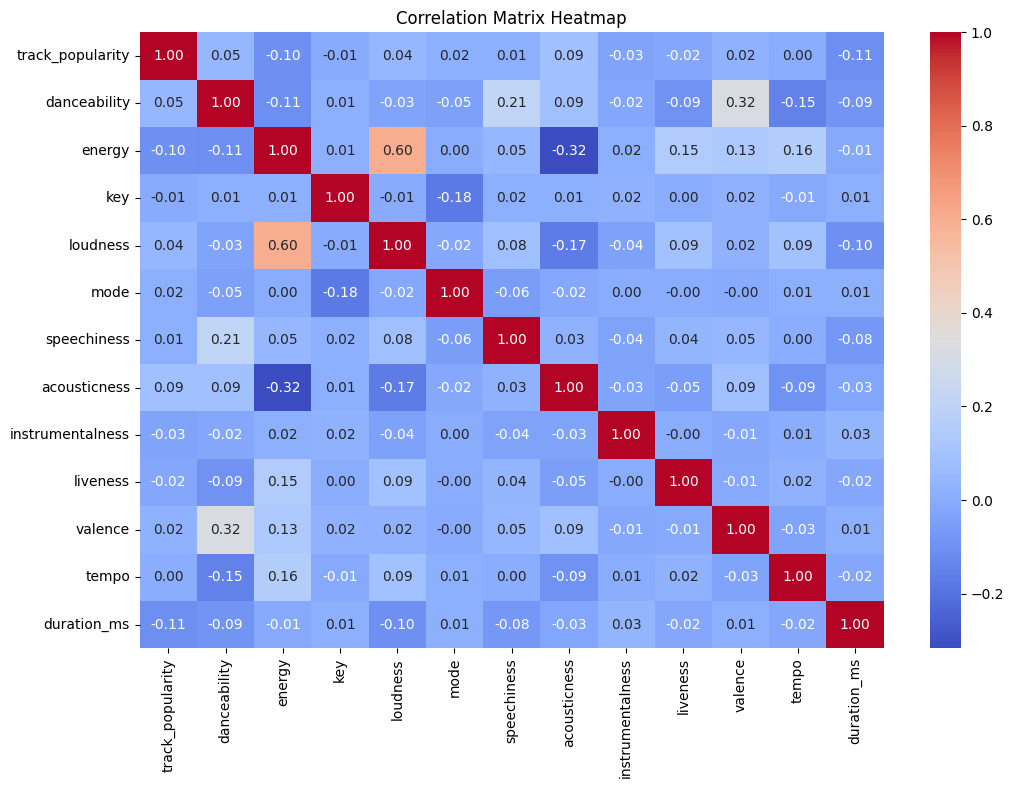

In [25]:
# Correlation matrix
numerical_features = songs_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Scaling

Feature scaling is an essential data preprocessing step when working with machine learning algorithms. It aims to normalize the range of independent variables or features of the data. In simpler terms, it's about getting different variables to be on similar scales so no particular variable dominates others when feeding data to the model.

There are mainly two types of feature scaling:

1. **Normalization (Min-Max Scaling):** This method scales the features such that they have values between 0 and 1.

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

2. **Standardization (Z-score normalization):** This method scales the features such that they have a mean of 0 and a standard deviation of 1.

$$X_{standard} = \frac{X - \mu}{\sigma}$$

Where:
- $X$ is the original feature vector
- $\mu$ is the mean of the feature vector
- $\sigma$ is its standard deviation

### Normalization

#### Normalization of `track_popularity`

In [26]:
#Popularity Normalization
scaler_minmax = MinMaxScaler()
songs_data[['track_popularity_normalized']] = scaler_minmax.fit_transform(songs_data[['track_popularity']])

# Display the first few rows to check the new columns
songs_data[['track_popularity_normalized', 'track_popularity']].head()

track_popularity_normalized  track_popularity
track_id                                                             
6ho0GyrWZN3mhi9zVRW7xi                         0.79              79.0
4bYJKHG6KLdGzHQRJMaFc8                         0.03               3.0
1VGlMYqPO1LHyclvfIMvWI                         0.00               0.0
6BbINUfGabVyiNFJpQXn3x                         0.62              62.0
1Ly0ssAgeM7YqdHptao8Oe                         0.15              15.0

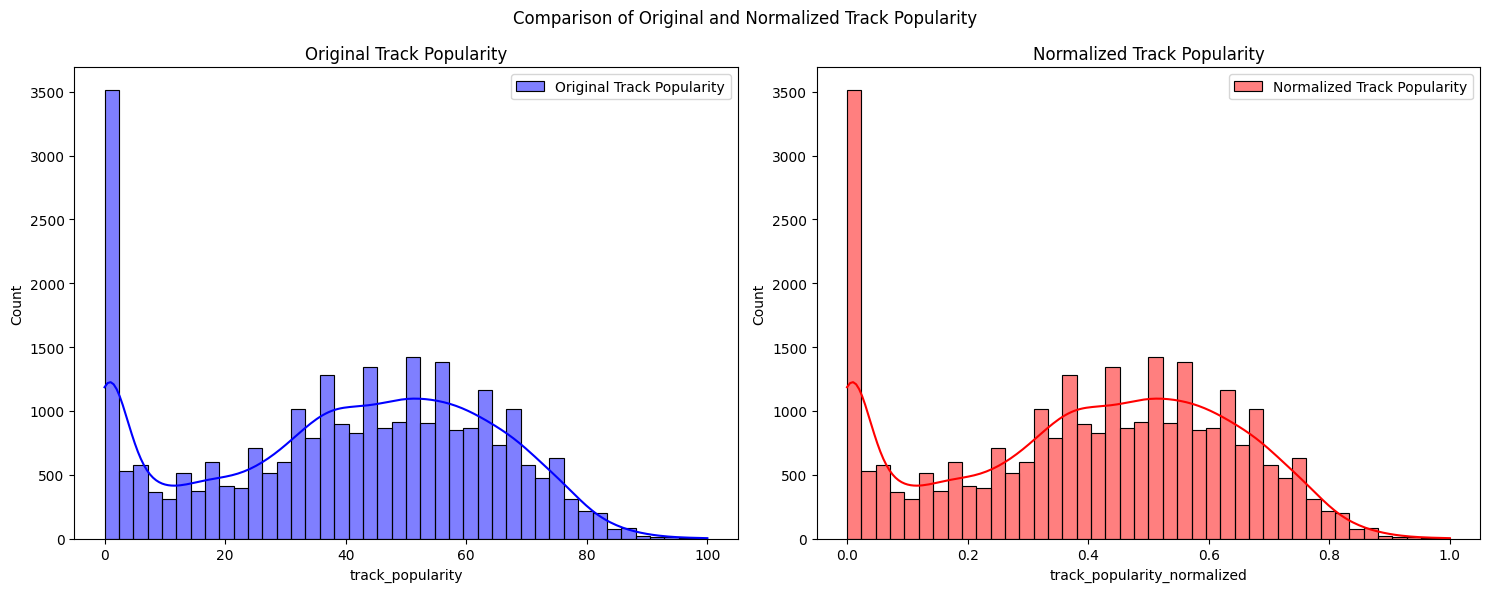

In [27]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Track Popularity
sns.histplot(songs_data['track_popularity'], color='blue', label='Original Track Popularity', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Track Popularity')

# Plotting Normalized Track Popularity
sns.histplot(songs_data['track_popularity_normalized'], color='red', label='Normalized Track Popularity', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Track Popularity')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Track Popularity')

plt.tight_layout()
plt.show()

#### Normalization of `acousticness`

In [28]:
#Acousticness Normaliztion
scaler_minmax = MinMaxScaler()
songs_data[['acousticness_normalized']] = scaler_minmax.fit_transform(songs_data[['acousticness']])

# Display the first few rows to check the new columns
songs_data[['acousticness_normalized', 'acousticness']].head()

acousticness_normalized  acousticness
track_id                                                     
6ho0GyrWZN3mhi9zVRW7xi                 0.002898      0.001820
4bYJKHG6KLdGzHQRJMaFc8                 0.072930      0.045800
1VGlMYqPO1LHyclvfIMvWI                 0.000646      0.000406
6BbINUfGabVyiNFJpQXn3x                 0.003041      0.001910
1Ly0ssAgeM7YqdHptao8Oe                 0.000134      0.000084

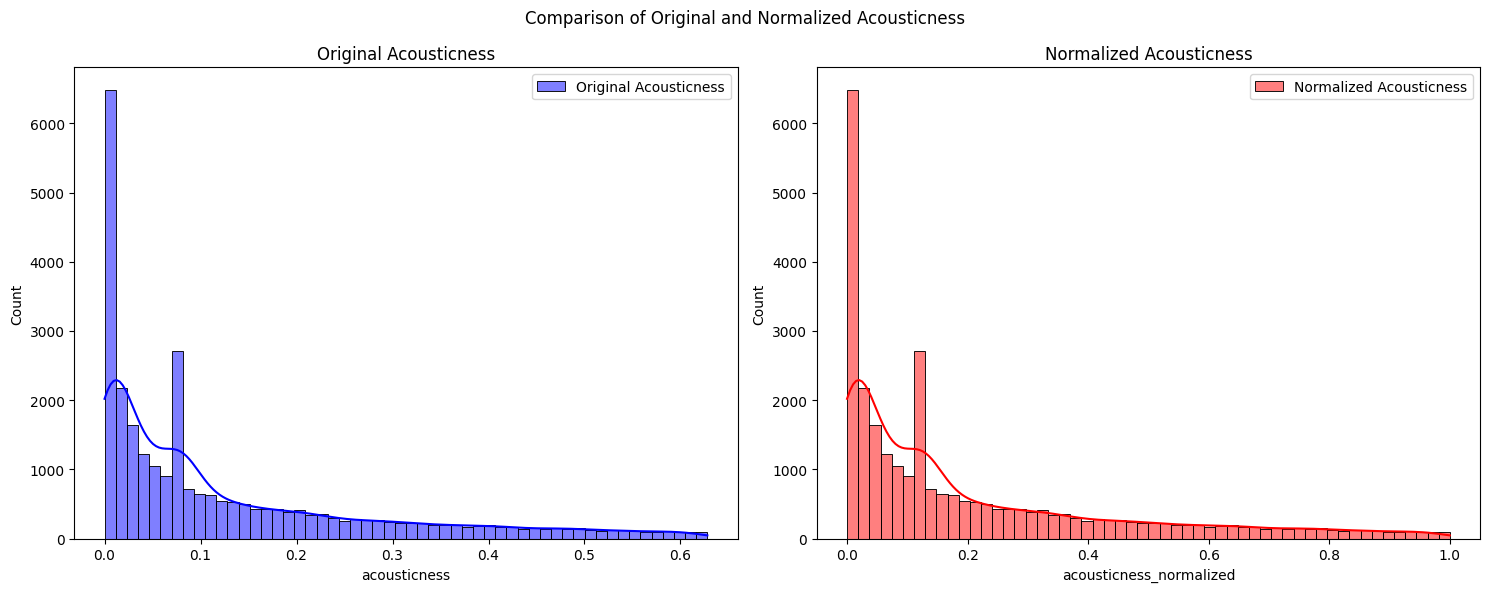

In [29]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Acousticness
sns.histplot(songs_data['acousticness'], color='blue', label='Original Acousticness', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Acousticness')

# Plotting Normalized Acousticness
sns.histplot(songs_data['acousticness_normalized'], color='red', label='Normalized Acousticness', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Acousticness')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Acousticness')

plt.tight_layout()
plt.show()

#### Normalization of `instrumentalness`

In [30]:
#Instrumentalness Normalization
scaler_minmax = MinMaxScaler()
songs_data[['instrumentalness_normalized']] = scaler_minmax.fit_transform(songs_data[['instrumentalness']])

# Display the first few rows to check the new columns
songs_data[['instrumentalness_normalized', 'instrumentalness']].head()

instrumentalness_normalized  instrumentalness
track_id                                                             
6ho0GyrWZN3mhi9zVRW7xi                     0.001262          0.000021
4bYJKHG6KLdGzHQRJMaFc8                     0.000000          0.000000
1VGlMYqPO1LHyclvfIMvWI                     0.001262          0.000021
6BbINUfGabVyiNFJpQXn3x                     0.634146          0.010400
1Ly0ssAgeM7YqdHptao8Oe                     0.145732          0.002390

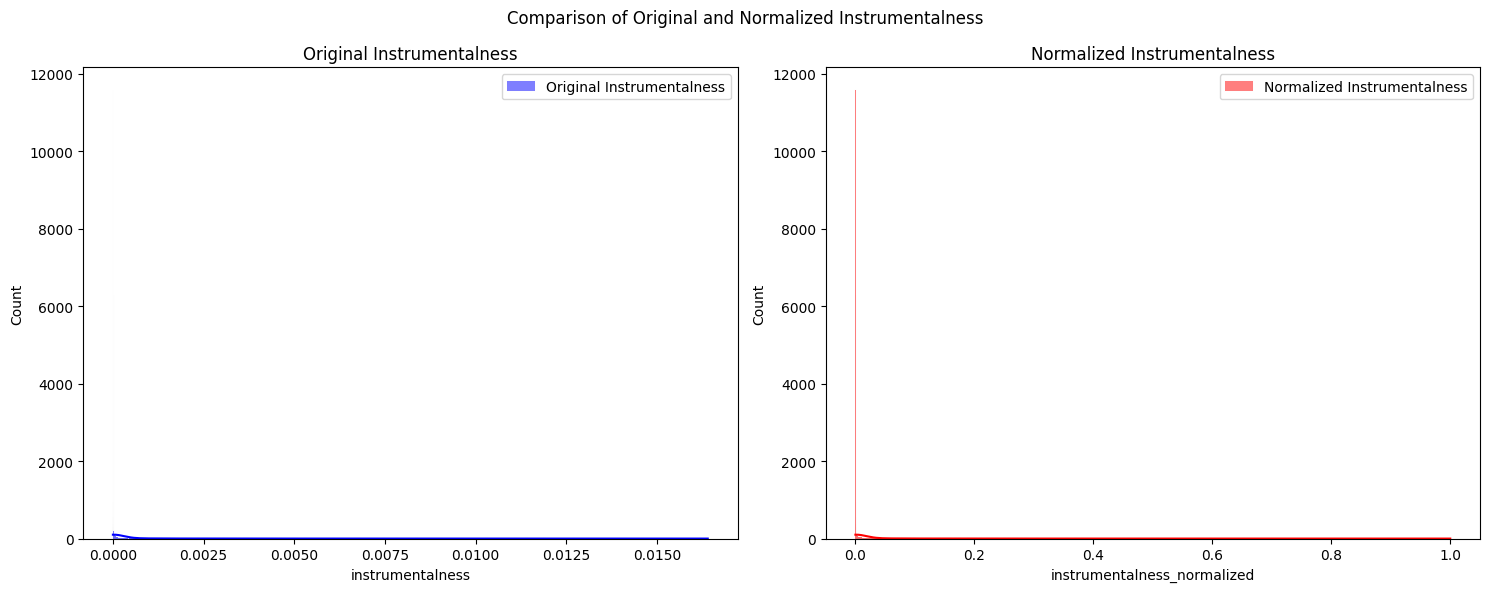

In [31]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Instrumentalness
sns.histplot(songs_data['instrumentalness'], color='blue', label='Original Instrumentalness', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Instrumentalness')

# Plotting Normalized Instrumentalness
sns.histplot(songs_data['instrumentalness_normalized'], color='red', label='Normalized Instrumentalness', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Instrumentalness')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Instrumentalness')

plt.tight_layout()
plt.show()

#### Normalization `duration_ms`

In [32]:
#Duration Normalization
scaler_minmax = MinMaxScaler()
songs_data[['duration_ms_normalized']] = scaler_minmax.fit_transform(songs_data[['duration_ms']])

# Display the first few rows to check the new columns
songs_data[['duration_ms_normalized', 'duration_ms']].head()

duration_ms_normalized  duration_ms
track_id                                                   
6ho0GyrWZN3mhi9zVRW7xi                0.599121     248036.0
4bYJKHG6KLdGzHQRJMaFc8                0.301949     168160.0
1VGlMYqPO1LHyclvfIMvWI                0.685442     271238.0
6BbINUfGabVyiNFJpQXn3x                0.321247     173347.0
1Ly0ssAgeM7YqdHptao8Oe                0.302991     168440.0

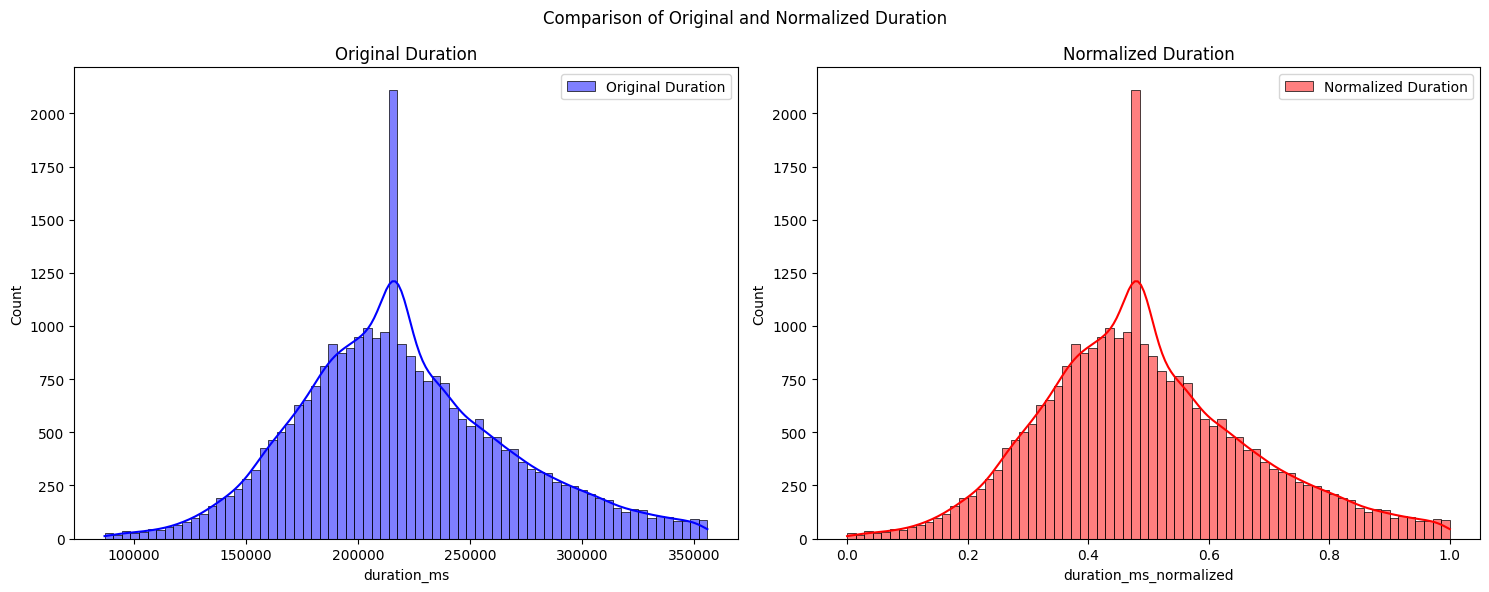

In [33]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Duration
sns.histplot(songs_data['duration_ms'], color='blue', label='Original Duration', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Duration')

# Plotting Normalized Duration
sns.histplot(songs_data['duration_ms_normalized'], color='red', label='Normalized Duration', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Duration')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Duration')

plt.tight_layout()
plt.show()

#### Normalization `tempo`

In [34]:
#Tempo Normalization
scaler_minmax = MinMaxScaler()
songs_data['tempo_normalized'] = scaler_minmax.fit_transform(songs_data[['tempo']])

# Display the first few rows to check the new columns
songs_data[['tempo', 'tempo_normalized']].head()

tempo  tempo_normalized
track_id                                         
6ho0GyrWZN3mhi9zVRW7xi  125.000          0.558787
4bYJKHG6KLdGzHQRJMaFc8  144.684          0.703476
1VGlMYqPO1LHyclvfIMvWI   99.993          0.374970
6BbINUfGabVyiNFJpQXn3x  157.970          0.801136
1Ly0ssAgeM7YqdHptao8Oe  162.721          0.836059

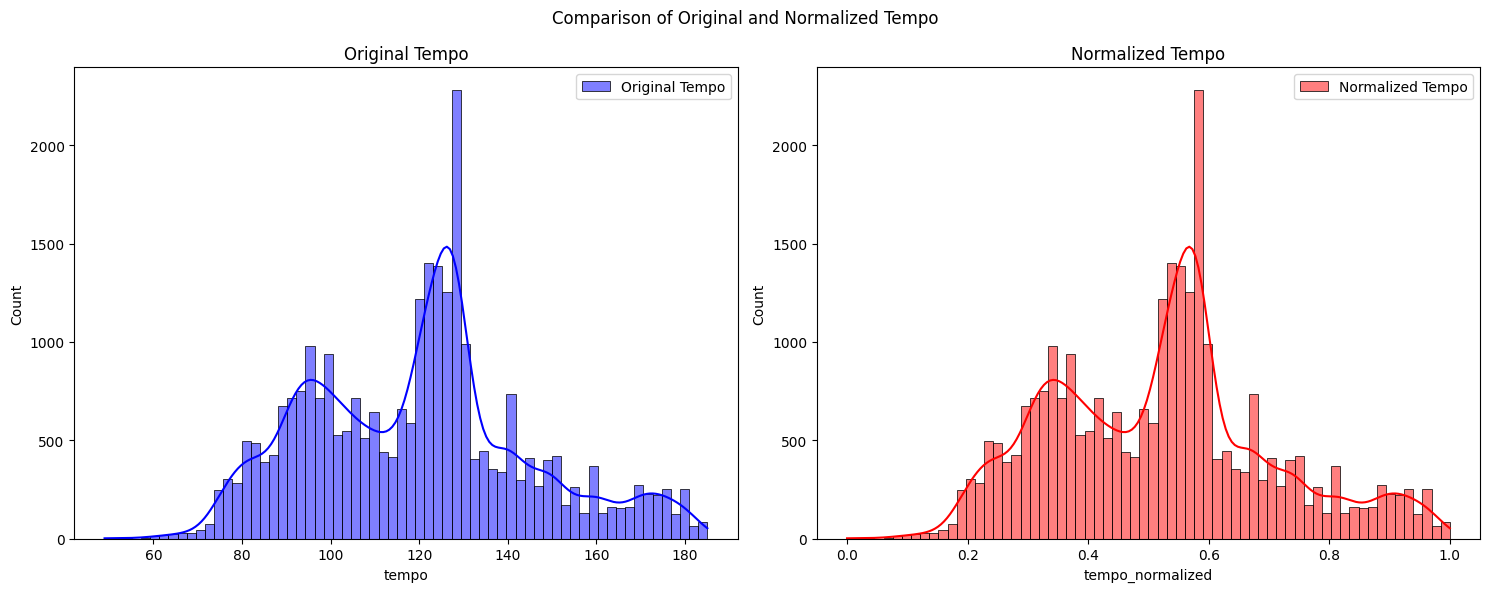

In [35]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Tempo
sns.histplot(songs_data['tempo'], color='blue', label='Original Tempo', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Tempo')

# Plotting Normalized Tempo
sns.histplot(songs_data['tempo_normalized'], color='red', label='Normalized Tempo', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Tempo')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Tempo')

plt.tight_layout()
plt.show()

### Bining Continuous Variables

Binning is the process of converting continuous variables into discrete ones. This is done by segmenting the variable into bins or intervals. Binning can help in improving the accuracy of predictive models, especially when certain thresholds in continuous variables mark significant changes.

#### Binning the `speechiness` column

Speechiness detects the presence of spoken words in a track. The more
exclusively speech-like the recording (e.g. talk show, audio book,
poetry), the closer to 1.0 the attribute value.


**Defining the bin edges and labels**
   
   We first need to determine the age ranges for each category:
   - `Music`: 0 to 0.33
   - `Mixed`: 0.33 to 0.66
   - `Speech`: 0.66 to 1.0

Accordingly, we define the bin edges and labels:

In [36]:
#Binning Values
# Binning the 'speechiness' feature
bin_labels = ['Music', 'Mixed', 'Speech']

# Define the bin edges based on the given thresholds
bin_edges = [0, 0.33, 0.66, 1.0]

# Bin 'speechiness' using cut with defined edges and labels
songs_data['speechiness_binned'] = pd.cut(songs_data['speechiness'], bins=bin_edges, labels=bin_labels, right=True, include_lowest=True)

#One-Hot encoding to the new column of Speechiness
one_hot_genre = pd.get_dummies(songs_data['speechiness_binned'], prefix='speechiness_binned', drop_first=True, dtype='int')
songs_data = pd.concat([songs_data, one_hot_genre], axis=1)
songs_data = songs_data.drop(['speechiness_binned', 'speechiness'], axis=1)

# Display the first few rows to check the binning
songs_data.head()

track_popularity genre  danceability  energy   key  \
track_id                                                                     
6ho0GyrWZN3mhi9zVRW7xi              79.0   edm         0.760   0.964   2.0   
4bYJKHG6KLdGzHQRJMaFc8               3.0  rock         0.581   0.831   1.0   
1VGlMYqPO1LHyclvfIMvWI               0.0   edm         0.661   0.760   8.0   
6BbINUfGabVyiNFJpQXn3x              62.0   rap         0.718   0.679  11.0   
1Ly0ssAgeM7YqdHptao8Oe              15.0  rock         0.426   0.619   4.0   

                        loudness  mode  acousticness  instrumentalness  \
track_id                                                                 
6ho0GyrWZN3mhi9zVRW7xi    -5.844   1.0      0.001820          0.000021   
4bYJKHG6KLdGzHQRJMaFc8    -8.045   1.0      0.045800          0.000000   
1VGlMYqPO1LHyclvfIMvWI    -4.769   1.0      0.000406          0.000021   
6BbINUfGabVyiNFJpQXn3x    -5.899   0.0      0.001910          0.010400   
1Ly0ssAgeM7YqdHptao8Oe   -11.501   0.0      0.000084          0.002390   

                        liveness  ...    tempo  duration_ms  genre_encoded  \
track_id                          ...                                        
6ho0GyrWZN3mhi9zVRW7xi    0.0974  ...  125.000     248036.0              0   
4bYJKHG6KLdGzHQRJMaFc8    0.0782  ...  144.684     168160.0              5   
1VGlMYqPO1LHyclvfIMvWI    0.1270  ...   99.993     271238.0              0   
6BbINUfGabVyiNFJpQXn3x    0.3850  ...  157.970     173347.0              4   
1Ly0ssAgeM7YqdHptao8Oe    0.1700  ...  162.721     168440.0              5   

                        track_popularity_normalized  acousticness_normalized  \
track_id                                                                       
6ho0GyrWZN3mhi9zVRW7xi                         0.79                 0.002898   
4bYJKHG6KLdGzHQRJMaFc8                         0.03                 0.072930   
1VGlMYqPO1LHyclvfIMvWI                         0.00                 0.000646   
6BbINUfGabVyiNFJpQXn3x                         0.62                 0.003041   
1Ly0ssAgeM7YqdHptao8Oe                         0.15                 0.000134   

                        instrumentalness_normalized  duration_ms_normalized  \
track_id                                                                      
6ho0GyrWZN3mhi9zVRW7xi                     0.001262                0.599121   
4bYJKHG6KLdGzHQRJMaFc8                     0.000000                0.301949   
1VGlMYqPO1LHyclvfIMvWI                     0.001262                0.685442   
6BbINUfGabVyiNFJpQXn3x                     0.634146                0.321247   
1Ly0ssAgeM7YqdHptao8Oe                     0.145732                0.302991   

                        tempo_normalized  speechiness_binned_Mixed  \
track_id                                                             
6ho0GyrWZN3mhi9zVRW7xi          0.558787                         0   
4bYJKHG6KLdGzHQRJMaFc8          0.703476                         0   
1VGlMYqPO1LHyclvfIMvWI          0.374970                         0   
6BbINUfGabVyiNFJpQXn3x          0.801136                         0   
1Ly0ssAgeM7YqdHptao8Oe          0.836059                         0   

                        speechiness_binned_Speech  
track_id                                           
6ho0GyrWZN3mhi9zVRW7xi                          0  
4bYJKHG6KLdGzHQRJMaFc8                          0  
1VGlMYqPO1LHyclvfIMvWI                          0  
6BbINUfGabVyiNFJpQXn3x                          0  
1Ly0ssAgeM7YqdHptao8Oe                          0  

[5 rows x 21 columns]

#### Threshold for `instrumentalness` and `liveness` features

The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


We create a new binary feature `is_instrumental`:

- Assign a value of 1 (or True) to tracks where instrumentalness is above 0.5.
- Assign a value of 0 (or False) to tracks where instrumentalness is below or equal to 0.5.


In [37]:
# Define a threshold for instrumentalness to determine vocal vs instrumental
instrumental_threshold = 0.5

# Create a new binary feature 'is_instrumental'
songs_data['is_instrumental'] = (songs_data['instrumentalness_normalized'] > instrumental_threshold).astype(int)

# Display the first few rows to check the new feature
print(songs_data[['instrumentalness_normalized', 'is_instrumental']].head())

                        instrumentalness_normalized  is_instrumental
track_id                                                            
6ho0GyrWZN3mhi9zVRW7xi                     0.001262                0
4bYJKHG6KLdGzHQRJMaFc8                     0.000000                0
1VGlMYqPO1LHyclvfIMvWI                     0.001262                0
6BbINUfGabVyiNFJpQXn3x                     0.634146                1
1Ly0ssAgeM7YqdHptao8Oe                     0.145732                0


Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

We create a new binary feature `is_live`:

- Assign a value of 1 (or True) to tracks where liveness is above 0.8.
- Assign a value of 0 (or False) to tracks where liveness is below or equal to 0.8.

In [38]:
# Define the threshold for liveness to determine live vs not live
live_threshold = 0.8

# Create a new binary feature 'is_live'
songs_data['is_live'] = (songs_data['liveness'] > live_threshold).astype(int)

# Display the first few rows to check the new feature
print(songs_data[['liveness', 'is_live']].head())

                        liveness  is_live
track_id                                 
6ho0GyrWZN3mhi9zVRW7xi    0.0974        0
4bYJKHG6KLdGzHQRJMaFc8    0.0782        0
1VGlMYqPO1LHyclvfIMvWI    0.1270        0
6BbINUfGabVyiNFJpQXn3x    0.3850        0
1Ly0ssAgeM7YqdHptao8Oe    0.1700        0


### Creation of new features

Given that the correlation between loudness and energy is 0.68 and the correlation between valence and danceability is 0.33, we selected the following creation of interaction features to capture these relationships. By creating these interaction terms, we aim to enhance the model's ability to understand the combined effects of these features.

This approach leverages the existing correlations in the dataset to potentially improve the performance of the machine learning model.

In [39]:
# Create new features
songs_data['loudness_energy_interaction'] = songs_data['loudness'] * songs_data['energy']
songs_data['valence_danceability_interaction'] = songs_data['valence'] * songs_data['danceability']

# Display the first few rows to check the new features
songs_data[['loudness_energy_interaction', 'valence_danceability_interaction']].head()

loudness_energy_interaction  \
track_id                                              
6ho0GyrWZN3mhi9zVRW7xi                    -5.633616   
4bYJKHG6KLdGzHQRJMaFc8                    -6.685395   
1VGlMYqPO1LHyclvfIMvWI                    -3.624440   
6BbINUfGabVyiNFJpQXn3x                    -4.005421   
1Ly0ssAgeM7YqdHptao8Oe                    -7.119119   

                        valence_danceability_interaction  
track_id                                                  
6ho0GyrWZN3mhi9zVRW7xi                          0.487160  
4bYJKHG6KLdGzHQRJMaFc8                          0.514185  
1VGlMYqPO1LHyclvfIMvWI                          0.290179  
6BbINUfGabVyiNFJpQXn3x                          0.147190  
1Ly0ssAgeM7YqdHptao8Oe                          0.162732

## Drop of columns

In [40]:
# Removing genre column, since we already have a encoded one
songs_data = songs_data.drop('genre', axis=1)

# Removing track_popularity column
songs_data = songs_data.drop('track_popularity', axis=1)

# Removing acousticness column
songs_data = songs_data.drop('acousticness', axis=1)

# Removing instrumentalness column
songs_data = songs_data.drop('instrumentalness', axis=1)

# Removing duration_ms column
songs_data = songs_data.drop('duration_ms', axis=1)

# Removing tempo column
songs_data = songs_data.drop('tempo', axis=1)

# Removing liveness column
songs_data = songs_data.drop('liveness', axis=1)

## Model Training

In [41]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28337 entries, 6ho0GyrWZN3mhi9zVRW7xi to 6sYJuVcEu4gFHmeTLdHzRz
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   danceability                      28337 non-null  float64
 1   energy                            28337 non-null  float64
 2   key                               28337 non-null  float64
 3   loudness                          28337 non-null  float64
 4   mode                              28337 non-null  float64
 5   valence                           28337 non-null  float64
 6   genre_encoded                     28337 non-null  int32  
 7   track_popularity_normalized       28337 non-null  float64
 8   acousticness_normalized           28337 non-null  float64
 9   instrumentalness_normalized       28337 non-null  float64
 10  duration_ms_normalized            28337 non-null  float64
 11  tempo_normalized                  

In [59]:
#Model Training
X = songs_data.drop(['genre_encoded'], axis=1)
y = songs_data['genre_encoded']

# Encode the target variable
y = pd.factorize(y)[0]

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to be tested
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)
        
        # Calculate ROC AUC
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        
        # Determine target names (assuming label_encoder.classes_ is correctly formatted)
        target_names = [str(cls) for cls in label_encoder.classes_]  # Convert classes to strings
        
        # Print classification report with ROC AUC
        report = classification_report(y_test, y_pred, target_names=target_names)
        print(f"{name} Classification Report:")
        print(report)
        print(f"ROC AUC: {roc_auc:.4f}\n")
        
        # Store model scores (e.g., accuracy) and ROC AUC
        model_scores[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'ROC AUC': roc_auc
        }
    
    return model_scores

# Evaluate the models
scores = evaluate_models(models, X_train, y_train, X_test, y_test)
print("Model scores:", scores)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       963
           1       0.48      0.54      0.51       886
           2       0.41      0.40      0.41      1114
           3       0.37      0.27      0.31       812
           4       0.38      0.43      0.41       877
           5       0.35      0.26      0.30      1016

    accuracy                           0.42      5668
   macro avg       0.42      0.42      0.42      5668
weighted avg       0.42      0.42      0.42      5668

ROC AUC: 0.7500

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.67      0.56       963
           1       0.49      0.51      0.50       886
           2       0.45      0.43      0.44      1114
           3       0.34      0.34      0.34       812
           4       0.36      0.33      0.34       877
           5       0.35      0.25      0.29  

## Model Evaluation

[[702  33  42  47  30 109]
 [ 36 565  44  18 128  95]
 [ 57  60 669  95 132 101]
 [ 70  37 155 306  97 147]
 [ 20  83 186  68 405 115]
 [128 157 100 110 138 383]]


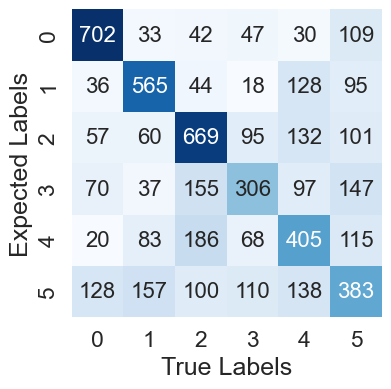

In [64]:
#Model Evaluation
#In this plot we can see were our plot is having the biggest errors and where it is beeing more accertive
rs_rf.fit(X_train, y_train);
y_preds = rs_rf.predict(X_test)

print(confusion_matrix(y_test, y_preds))
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(4,4))
  cm = confusion_matrix(y_test, y_preds)
  ax = sns.heatmap(cm,
                     annot=True,  # Add annotations
                     fmt='d',  # Format of numbers
                     cmap='Blues',  # Color palette
                     cbar=False,  # emove the color bar
                     annot_kws={"size": 16})
  plt.xlabel('True Labels')
  plt.ylabel('Expected Labels')

plot_conf_mat(y_test, y_preds)

In [65]:
clf = LogisticRegression()
clf.fit(X_train, y_train);

clf.coef_

array([[ 0.19243743,  1.04518431,  0.00367036, -0.38235546, -0.10431614,
        -1.53419232, -0.35562023, -0.30087278, -0.01265532, -0.31429491,
         0.2517649 ,  0.        ,  0.        ,  0.0127623 ,  0.        ,
         0.39724364,  0.92517342],
       [-1.16176101,  0.77130856, -0.01358698, -0.99663568,  0.24153395,
         0.53610108,  0.17827177, -0.02970009,  0.22171633,  0.31491109,
        -0.03162836,  0.        ,  0.        , -0.10303923,  0.        ,
         0.42859054, -0.06128231],
       [ 0.62734077, -0.36991714,  0.02114554,  0.24719026, -0.07948834,
        -0.01597638,  0.01258907,  0.03916308, -0.28056706, -0.13237678,
         0.08559864,  0.        ,  0.        ,  0.14636487,  0.        ,
        -0.08797161, -0.20993154],
       [ 0.42011385, -0.0951131 ,  0.02551138,  0.28713436,  0.00642717,
         0.33368886,  0.05014043,  0.21286068, -0.02455283, -0.07720081,
        -0.06962365,  0.        ,  0.        , -0.02553827,  0.        ,
        -0.12085094

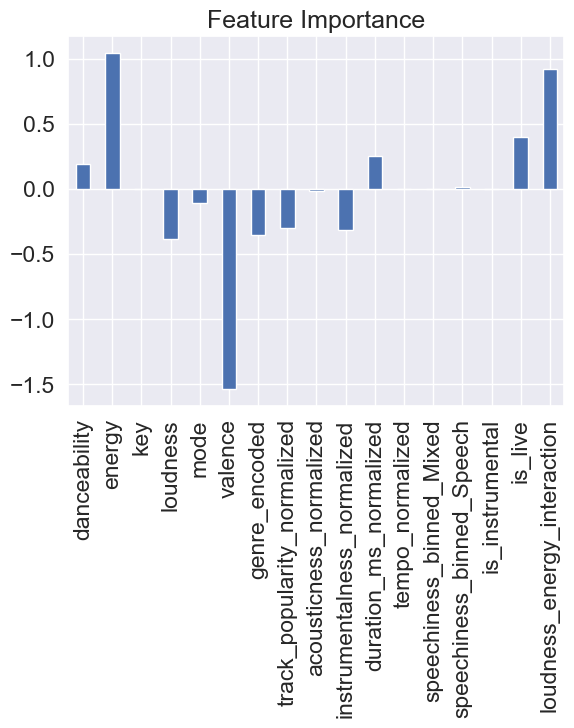

In [66]:
features_dict = dict(zip(songs_data.columns, list(clf.coef_[0])))
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);